# **Image Segmentation**

Tên của lớp bài toán là **Image Segmentation** có nghĩa là ***phân khúc hình ảnh***, hàm ý rằng bài toán sẽ phân chia một hình ảnh thành nhiều vùng ảnh khác nhau. **Image Segmentation** cũng có chung mục tiêu như ***Object Detection*** là phát hiện ra vùng ảnh chứa vật thể và gán nhãn phù hợp cho chúng. Tuy nhiên tiêu chuẩn về độ chính xác của **Image Segmentation** ở mức cao hơn so với ***Object Detection*** khi nó yêu cầu nhãn dự báo đúng tới từng *pixel*.

![image](https://cdn.analyticsvidhya.com/wp-content/uploads/2019/03/instance_segmentation_example.jpg)

## ***Input và output của bài toán Image Segmentation***

**Image Segmentation** nếu được huấn luyện theo bài toán học có giám sát trong thị giác máy tính thì sẽ yêu cầu gán nhãn cho ảnh. *Input* của bài toán là một bức ảnh và *output* là một ma trận mask mà giá trị của từng *pixel* đã được gãn nhãn trên đó.

![image](https://imgur.com/OD9uMOE.png)

# **Các dạng image segmentation khác nhau**

Có 2 bài toán image segmentation chính:

* Semantic segmentation: Chúng ta phân đoạn (segment) các vùng ảnh theo những nhãn khác nhau mà không phân biệt sự khác nhau giữa các đối tượng trong từng nhãn. Ví dụ trong hình ảnh bên trái chúng ta phân biệt được pixel nào thuộc về người và pixel nào thuộc về background. Tuy nhiên trong bức ảnh xuất hiện 5 người, mức độ phân chia sẽ không xác định từng pixel thuộc về người nào.

* Instance segmentation: Chúng ta phân đoạn các vùng ảnh chi tiết đến từng đối tượng trong mỗi nhãn. Ví dụ: ở hình ảnh bên phải đối với nhãn người sẽ được phân chia chi tiết tới từng người 1, 2, … , 5.

![image](https://cdn.analyticsvidhya.com/wp-content/uploads/2019/03/Screenshot-from-2019-03-28-12-08-09.png)

# **Các thuật ngữ**

 * **Upsampling:** Các kỹ thuật giúp tăng kích thước output trong mạng CNN.
 * **Tích chập chuyển vị** (*Conv2DTranspose* hoặc *Transposed Conv2D*): Một dạng tích chập giúp gia tăng kích thước của mạng CNN.
 * **Mạng giải chập** (*DeconvNet* hoặc *Deconvolutional Neural Network*): Là một mạng áp dụng liên tiếp quá trình Upsampling để giải mã ngược trở lại từ đặc trưng sang ảnh. Thường áp dụng trong các bài toán Image2Image.
 * **Vùng nhận thức** (*Receptive Field*): Là những vùng ảnh được áp dụng tích tập với bộ lọc để tạo ra các pixel ở output.
 * **Ma trận giãn nở** (*Dilation Matrix*): Là ma trận được tạo thành từ ma trận gốc bằng cách padding xen kẽ các dòng và cột bằng giá trị 0.

## **Mạng giải chập** (*Deconvolutional Neural Network*)

Một **mạng giải chập** sẽ có kiến trúc chung là *shape* của các *layers* tăng dần. Qua từng *layer* mạng sẽ giải mã các khối đặc trưng thành những thông tin không gian của từng điểm ảnh và tạo thành một bức ảnh mới ở *output*.

![image](https://www.researchgate.net/publication/330576431/figure/fig7/AS:718439987552256@1548300849513/The-architecture-of-the-deconvolution-network-used-in-this-work-White-layers-are.png)

Qúa trình gia tăng kích thước tại các *layers* của mạng giải chập còn được gọi là ***Upsampling***.

### ***Upsampling 2D Layer***

Chức năng của Upsampling 2D layer cũng tương tự như hàm resize với kích thước lớn hơn ảnh input trong opencv bằng cách copy các giá trị pixel liền kề theo các window size.

![image](https://imgur.com/UhwUfj0.png)


In [ ]:
import tensorflow as tf
import numpy as np

input_shape = (1, 2, 2, 1)
x = np.arange(1, 5, 1).reshape(input_shape)
print('x \n', x)
upLayer = tf.keras.layers.UpSampling2D(size=(2, 2))
y = upLayer(x)
print('y: \n', y)

x 
 [[[[1]
   [2]]

  [[3]
   [4]]]]
y: 
 tf.Tensor(
[[[[1]
   [1]
   [2]
   [2]]

  [[1]
   [1]
   [2]
   [2]]

  [[3]
   [3]
   [4]
   [4]]

  [[3]
   [3]
   [4]
   [4]]]], shape=(1, 4, 4, 1), dtype=int64)


Ngoài phương pháp upsampling bằng copy giá trị của pixel còn có những phương pháp khác như Bilinear Interpolation, Max-Unpooling, Bed of Nails.

### **Tích chập chuyển vị** (*Transposed Convolution*)

Gỉa sử từ ma trận đầu vào có kích thước $(w_1, h_1)$ sau khi áp dụng phép tích chập thông thường ta thu được kích thước $(w_2, h_2)$. Tích chập chuyển vị sẽ biến đổi từ một ma trận có kích thước $(w_2, h_2)$ của *output* sang ma trận có kích thước $(w_1, h_1)$ của *input* trong khi vẫn duy trì được các kiểu kết nối phù hợp với tích chập.

![image](https://imgur.com/pOK3wRe.png)

Cách tính tích chập chuyển vị:

![image](https://imgur.com/3fecoA3.png)



In [ ]:
import tensorflow as tf
import numpy as np

W=2
S=3
P=2
F=2

input_shape = (1, W, W, 1)
x = np.random.uniform(size = input_shape).astype(np.float32)
print('x: \n', x)
con2DTran = tf.keras.layers.Conv2DTranspose(filters = 1, 
                                            kernel_size=F, 
                                            strides=S, 
                                            output_padding = P,
                                            input_shape=(2, 2, 1))
y = con2DTran(x)
print('y: \n', y.shape)

x: 
 [[[[0.3748229 ]
   [0.5580087 ]]

  [[0.42904642]
   [0.29432017]]]]
y: 
 (1, 7, 7, 1)


### **Tích chập giãn nở** (*Dilation Convolution*)

![image](https://imgur.com/LMM70dw.png)

Từ ma trận *input* gốc bên trái, ta *padding* xen kẽ các dòng và cột 0 vào ma trận *input* và thu được ma trận *dilation* (ở giữa trong hình). Phép tích chập được thực hiện trên ma trận *dilation*. Kích thước ma trận sau tích chập tăng từ 2x2 lên 4x4.

# **Các thuật toán image segmentation**

## **Các phương pháp cổ điển**

### ***Sử dụng bộ lọc binary threshold***

Các vùng ảnh sẽ được chuyển về dạng đen trắng dựa trên cường độ sáng của chúng lớn hoặc nhỏ hơn một ngưỡng cố định. Phương pháp này cho kết quả biến đổi theo cường độ của ngưỡng lọc và thường không chuẩn xác đối với ảnh không có phân vùng màu sắc rõ ràng.

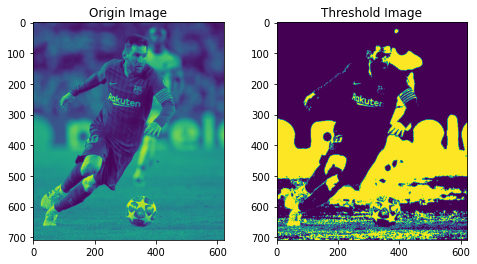

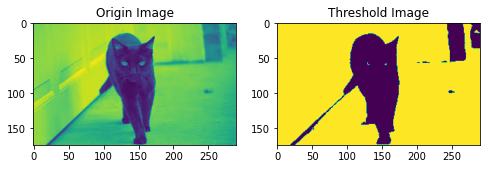

In [ ]:
import cv2
import numpy as np
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

url = 'https://i.imgur.com/1vzDG2J.jpg'
url2 = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQUxtQAW7BprF2vE6Bv6VMoLVtSsk-4gLifjDjXbuTV16ruR59rdIFCHp1oRhsSOvNOi9A&usqp=CAU'
def _downloadImage(url):
  resp = requests.get(url)
  img = np.asarray(bytearray(resp.content), dtype="uint8")
  img = cv2.imdecode(img, cv2.IMREAD_COLOR)
  return img

# Download image  
img = _downloadImage(url)
img2 = _downloadImage(url2)
# Gray convert
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
# Filter threshold according to minimum is 127
ret, th_img = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
ret2, th_img2 = cv2.threshold(img2_gray, 127, 255, cv2.THRESH_BINARY)
# Visualize
fg, ax = plt.subplots(1, 2, figsize = (8, 4))
fg2, ax2 = plt.subplots(1, 2, figsize = (8, 4))
for i, image in enumerate([img_gray, th_img]):
  ax[i].imshow(image)
  if i == 0:
    ax[i].set_title('Origin Image')
  else:
    ax[i].set_title('Threshold Image')

for i, image2 in enumerate([img2_gray, th_img2]):
  ax2[i].imshow(image2)
  if i == 0:
    ax2[i].set_title('Origin Image')
  else:
    ax2[i].set_title('Threshold Image')

### **K-mean clustering**

Thuật toán **k-mean clustering** sẽ phân cụm cường độ của các *pixels* trên ảnh thành $k$ *clusters*. Sau đó giá trị của mỗi *pixels* sẽ được thay thể bởi *centroids* của chúng để segment hình ảnh.

Centers found by scikit-learn:
[[ 86.33225972 140.33544883 127.99777344]
 [ 43.29972249  41.67322892  54.91830723]
 [161.73683501 176.1473516  191.64734197]]


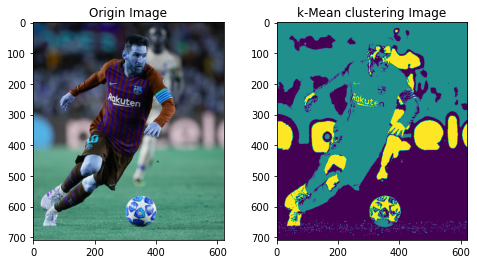

In [ ]:
import cv2
import numpy as np
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

img = _downloadImage(url)
from sklearn.cluster import KMeans

# Reshape X into tensor2D: (width x heigth, n_channels)
X = img.reshape((-1, 3))
# Kmeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
print('Centers found by scikit-learn:')
print(kmeans.cluster_centers_)
pred_label = kmeans.predict(X)

# Reshape pred_label
X_img = pred_label.reshape(img.shape[:2])

# Display image clustering
fg, ax = plt.subplots(1, 2, figsize = (8, 4))
for i, image in enumerate([img, X_img]):
  ax[i].imshow(image)
  if i == 0:
    ax[i].set_title('Origin Image')
  else:
    ax[i].set_title('k-Mean clustering Image')

### **Expectation Maximization Clustering**

Là phương pháp phát triển hơn của *K-Mean clustering*. Nó không chỉ là thuật toán *clustering* thông thường mà còn tìm ra **ước lượng hợp lý tối đa** (*maximum likelihood estimator*) trong các *parametric models*. Khi đó các *clusters* được biểu diễn bởi phân phối xác suất thay cho trung bình.

/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:267: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


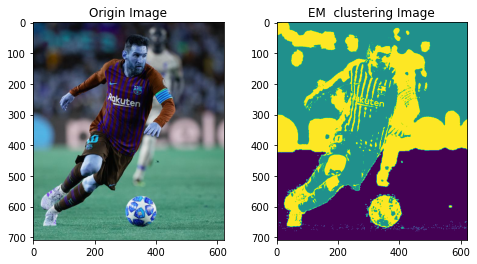

In [ ]:
from sklearn.mixture import GaussianMixture

em = GaussianMixture(n_components=3,
              covariance_type='full', max_iter=20, random_state=0).fit(X)

pred_label = em.predict(X)

# Reshape pred_label
X_img = pred_label.reshape(img.shape[:2])

# Display image clustering
fg, ax = plt.subplots(1, 2, figsize = (8, 4))
for i, image in enumerate([img, X_img]):
  ax[i].imshow(image)
  if i == 0:
    ax[i].set_title('Origin Image')
  else:
    ax[i].set_title('EM  clustering Image')

### **Mean shift Clustering**

**K-means** và **Expectation Maximization** yêu cầu chúng ta phải xác định trước số lượng các *clusters*. Sẽ rất khó xác định chính xác số lượng *clusters* vì nó biến động tùy theo ảnh đầu vào.

**Mean shift clustering** khắc phục được nhược điểm này khi tự động tìm ra được số lượng các *clusters* là hợp lý nhất cho mỗi một bức ảnh.

Text(0.5, 1.0, 'Mean Shift clustering Image')

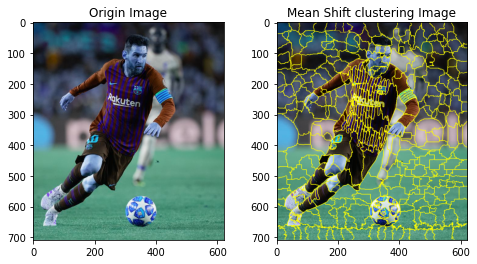

In [ ]:
from skimage.segmentation import quickshift
from skimage.segmentation import mark_boundaries

segments_quick = quickshift(img, kernel_size=5, max_dist=10, ratio=0.5)

# Display image clustering
fg, ax = plt.subplots(1, 2, figsize = (8, 4))

ax[0].imshow(img)
ax[0].set_title('Origin Image')
ax[1].imshow(mark_boundaries(img, segments_quick))
ax[1].set_title('Mean Shift clustering Image')

## **Các phương pháp hiện đại**

### **Thuật toán Mask R - CNN**

![image](https://miro.medium.com/max/2700/1*M_ZhHp8OXzWxEsfWu2e5EA.png)

* Một **base network** (hoặc *backbone*) là một mạng CNN có tác dụng trích trọc đặc trưng ảnh. Chúng ta sẽ *truncate output* của mạng CNN và chỉ lấy *feature map* tại *layer* cuối.

* *Feature map* tiếp tục được huấn luyện qua một mạng RPN để tìm ra các RoI (là những vùng có khả năng cao chứa vật thể).

* RoI sẽ được *crop* từ *feature map* và sử dụng RoI *pooling layer* để *reshape* và *stack* các RoI thành một khối cùng kích thước.

* Khối RoI tiếp tục được truyền qua các *layer fully connected* và tách làm 2 nhánh, một nhánh dự báo BBox (*bounding box*) và một nhánh dự báo nhãn.

* Một nhánh mới được add thêm ngay sau RoI *Pooling* để dự đoán mask cho ảnh.

### **Unet**

![image](https://imgur.com/lKZGO0C.png)

Kiến trúc mô hình **Unet**: Mỗi một thanh chữ nhật màu xanh là một *feature map* đa kênh. Kích thước ($width$ x $height$) được kí hiệu góc trái bên dưới của thanh chữ nhật và số lượng *channels* được kí hiệu trên đỉnh của *feature map*. Các thanh chữ nhật màu trắng bên nhánh phải của hình chữ U được *copy* từ nhánh bên trái và *concatenate* vào nhánh bên phải. Mỗi một mũi tên có màu sắc khác nhau tương ứng với một phép biến đổi khác nhau như chúng ta có thể thấy trong mô tả của mạng.

Kiến trúc mạng Unet bao gồm 2 phần là **phần thu hẹp** (*contraction*) ở bên trái và **phần mở rộng** (*expansion*) ở bên phải.

* **Phần thu hẹp**: Làm nhiệm vụ trích lọc đặc trưng để tìm ra bối cảnh của hình ảnh. Vai trò của phần thu hẹp tương tự như một *Encoder*. Một mạng **Deep CNN** sẽ đóng vai trò trích lọc đặc trưng. Lý do nhánh được gọi là thu hẹp vì kích thước dài và rộng của các *layers* giảm dần. Từ *input* kích thước 572x572 chỉ còn 32x32. Đồng thời độ sâu cũng tăng dần từ 3 lên 512.

* **Phần mở rộng**: Gồm các *layer* đối xứng tương ứng với các *layer* của nhánh thu hẹp. Quá trình ***Upsampling*** được áp dụng giúp cho kích thước *layer* tăng dần lên. Sau cùng ta thu được một ảnh mask đánh dấu nhãn dự báo của từng *pixel*.

In [ ]:
import tensorflow as tf

#downsampling
def _downsample_cnn_block(block_input, channel, is_first = False):
  if is_first:  
    conv1 = tf.keras.layers.Conv2D(filters=channel, kernel_size=3, strides=1)(block_input)
    conv2 = tf.keras.layers.Conv2D(filters=channel, kernel_size=3, strides=1)(conv1)
    return [block_input, conv1, conv2]
  else:
    maxpool = tf.keras.layers.MaxPool2D(pool_size=2)(block_input)
    conv1 = tf.keras.layers.Conv2D(filters=channel, kernel_size=3, strides=1)(maxpool)
    conv2 = tf.keras.layers.Conv2D(filters=channel, kernel_size=3, strides=1)(conv1)
    return [maxpool, conv1, conv2]

ds_block1 = _downsample_cnn_block(tf.keras.layers.Input(shape=(572, 572, 1)), channel=64, is_first = True)
ds_block2 = _downsample_cnn_block(ds_block1[-1], channel=128)
ds_block3 = _downsample_cnn_block(ds_block2[-1], channel=256)
ds_block4 = _downsample_cnn_block(ds_block3[-1], channel=512)
ds_block5 = _downsample_cnn_block(ds_block4[-1], channel=1024)

In [ ]:
def _upsample_cnn_block(block_input, block_counterpart, channel, is_last = False):  
  # Upsampling block
  uppool1 = tf.keras.layers.Convolution2DTranspose(channel, kernel_size=2, strides=2)(block_input)
  # Crop block counterpart
  shape_input = uppool1.shape[2]
  shape_counterpart = block_counterpart.shape[2]
  crop_size = int((shape_counterpart-shape_input)/2)
  block_counterpart_crop = tf.keras.layers.Cropping2D(cropping=((crop_size, crop_size), (crop_size, crop_size)))(block_counterpart)
  concat = tf.keras.layers.Concatenate(axis=-1)([block_counterpart_crop, uppool1])
  conv1 = tf.keras.layers.Conv2D(filters=channel, kernel_size=3, strides=1)(concat)
  conv2 = tf.keras.layers.Conv2D(filters=channel, kernel_size=3, strides=1)(conv1)
  if is_last:
    conv3 = tf.keras.layers.Conv2D(filters=2, kernel_size=3, strides=1)(conv2)
    return [concat, conv1, conv2, conv3]
  return [uppool1, concat, conv1, conv2]

us_block4 = _upsample_cnn_block(ds_block5[-1], ds_block4[-1], channel=512)
us_block3 = _upsample_cnn_block(us_block4[-1], ds_block3[-1], channel=256)
us_block2 = _upsample_cnn_block(us_block3[-1], ds_block2[-1], channel=128)
us_block1 = _upsample_cnn_block(us_block2[-1], ds_block1[-1], channel=64, is_last = True)

In [ ]:
model = tf.keras.models.Model(inputs = ds_block1[0], outputs = us_block1[-1])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 572, 572, 1) 0                                            
__________________________________________________________________________________________________
conv2d_10 (Conv2D)              (None, 570, 570, 64) 640         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_11 (Conv2D)              (None, 568, 568, 64) 36928       conv2d_10[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_4 (MaxPooling2D)  (None, 284, 284, 64) 0           conv2d_11[0][0]                  
______________________________________________________________________________________________

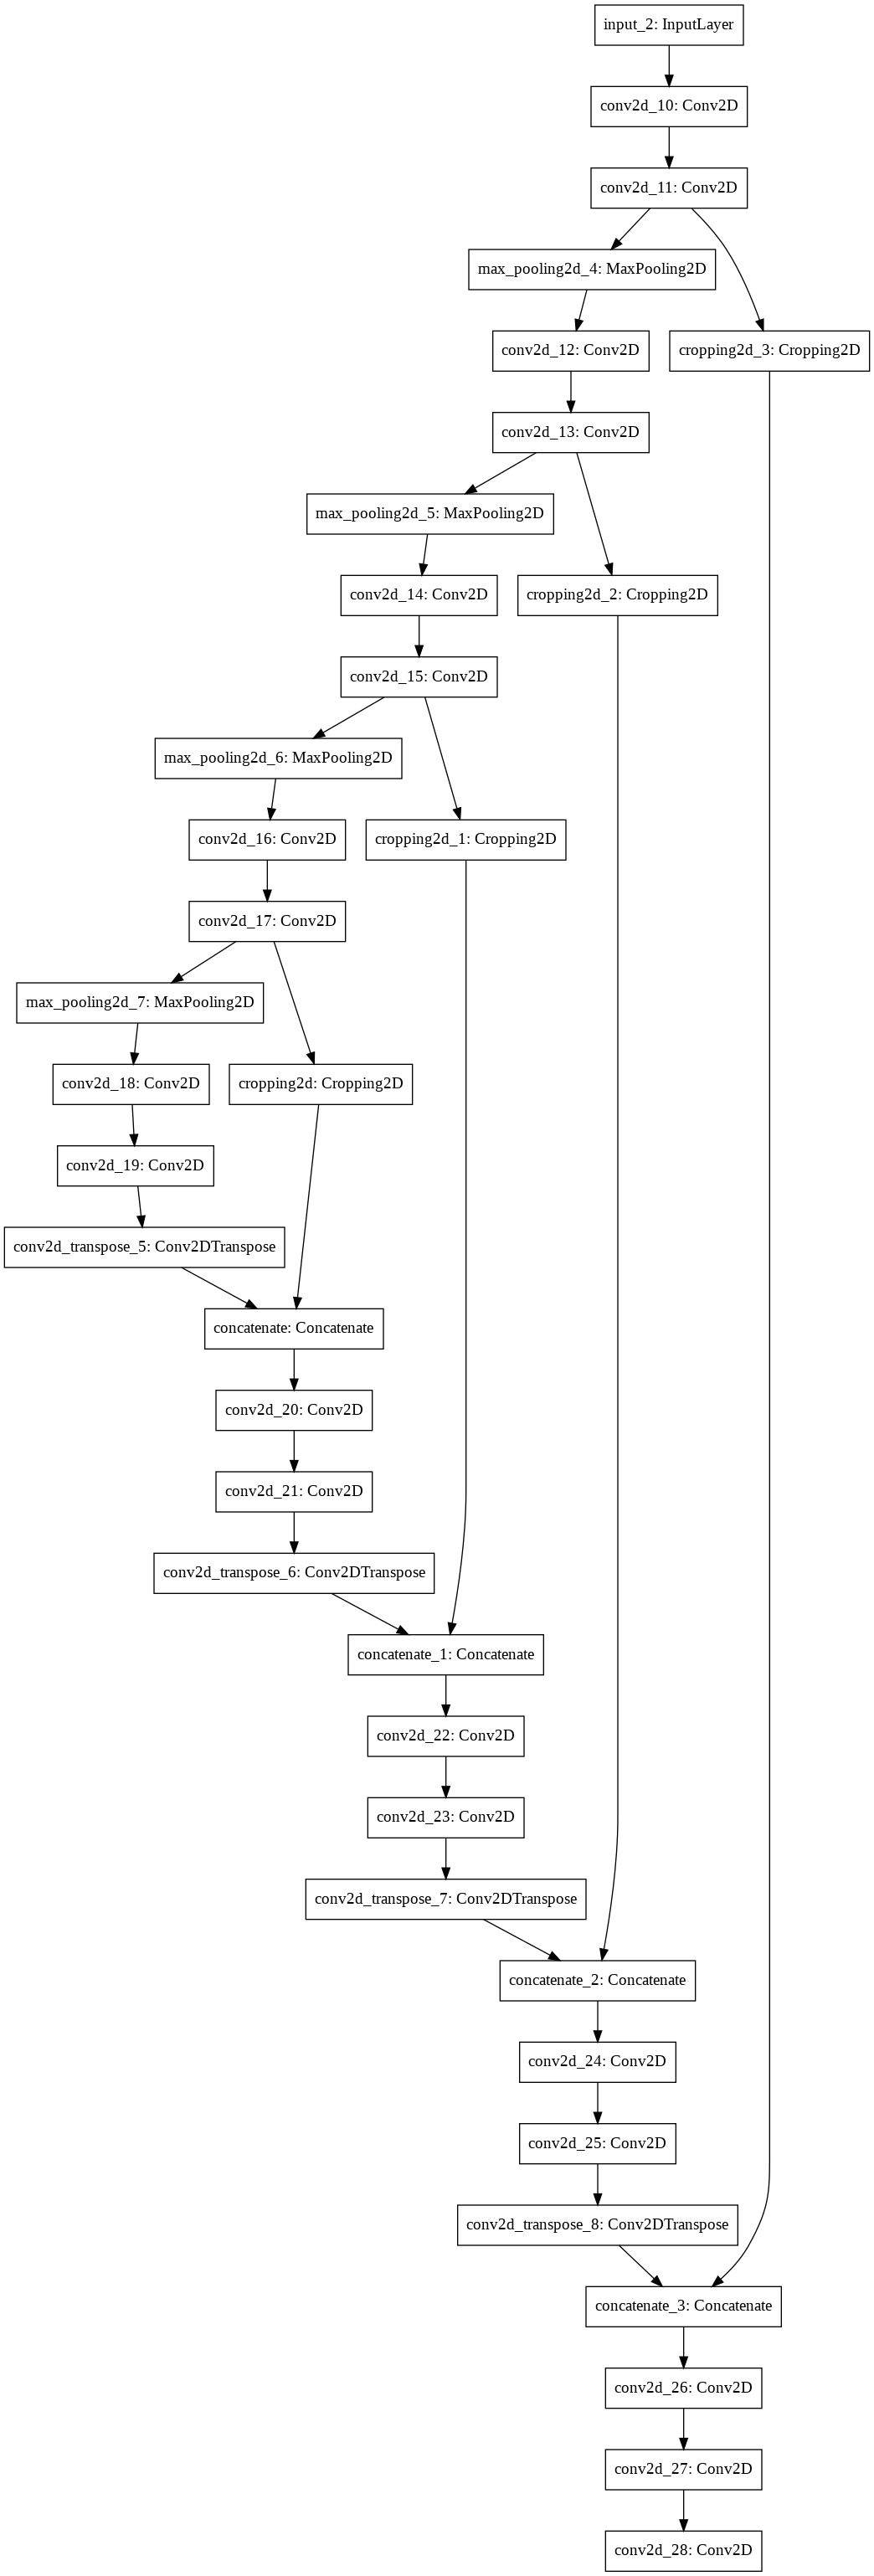

In [ ]:
tf.keras.utils.plot_model(model)

### **FCN**

**FCN** (***Fully Convolutional Network***) là một kiến trúc dựa trên mạng *CNN* nhằm mục đích segment một hình ảnh đầu vào bằng cách dự báo nhãn cho từng *pixel* trên ảnh *input*.

![image](https://imgur.com/K4jaiFe.png)

Kiến trúc gồm 2 path có tác dụng khác nhau đó là:

* **Downsampling path**: Trích suất đặc trưng ngữ cảnh và nội dung của ảnh. *Downsampling path* là kiến trúc thu hẹp kích thước *layer*. Đó chính là *layer CNN* ở vị trí đầu tiên, thông thường là những kiến trúc *CNN* cơ bản như *AlexNet, VGG16, VGG19, ResNet* đã được *Truncate Fully Connected*. *Output* của *Downsampling path* là *Feature Map* mang giá trị thông tin về vị trí và cường độ của các *pixels*. Tích chập kích thước 1x1 được áp dụng ngay sau *block CNN* với số lượng bộ lọc bằng với số lượng nhãn ở *output*.

* **Upsampling path**: Khôi phục thông tin không gian của ảnh theo các segment dự báo. Chúng ta áp dụng một *layer Transposed Conv* để giải chập thông tin thành *segmentation map*.

In [ ]:
import tensorflow as tf
# Load pretrain model
pretrain_net = tf.keras.applications.VGG19(include_top=True, weights="imagenet")

# In ra 5 layers shape cuối cùng
for layer in pretrain_net.layers[-5:]:
  print('layer {}: {}'.format(layer.output.name, layer.output.shape))

print('pretrain_net output: ', pretrain_net.output)

574726144/574710816 [==============================] - 4s 0us/step
layer block5_pool/MaxPool:0: (None, 7, 7, 512)
layer flatten/Reshape:0: (None, 25088)
layer fc1/Relu:0: (None, 4096)
layer fc2/Relu:0: (None, 4096)
layer predictions/Softmax:0: (None, 1000)
pretrain_net output:  KerasTensor(type_spec=TensorSpec(shape=(None, 1000), dtype=tf.float32, name=None), name='predictions/Softmax:0', description="created by layer 'predictions'")


In [ ]:
net = tf.keras.models.Model(
    inputs = pretrain_net.input,
    outputs = pretrain_net.layers[-5].output 
)

In [ ]:
num_classes=21
S=32 
F=7

# Tích chập 1x1 trên feature map output
conv2D = tf.keras.layers.Conv2D(
    num_classes, kernel_size=1)

# Tích chập chuyển vị
conv2DTran = tf.keras.layers.Conv2DTranspose(
    num_classes, kernel_size=F, strides=S)

# Khởi tạo mô hình
model = tf.keras.models.Sequential([
    net,
    conv2D,
    conv2DTran
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Functional)         (None, 7, 7, 512)         20024384  
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 7, 7, 21)          10773     
_________________________________________________________________
conv2d_transpose_9 (Conv2DTr (None, 224, 224, 21)      21630     
Total params: 20,056,787
Trainable params: 20,056,787
Non-trainable params: 0
_________________________________________________________________


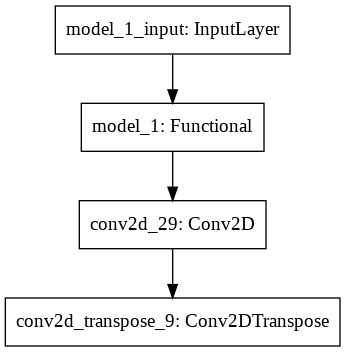

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model)

# **Test**

In [ ]:
from glob import glob
import shutil
import argparse
import zipfile
import hashlib
import requests
from tqdm import tqdm
import IPython.display as display
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import datetime, os
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from IPython.display import clear_output

AUTOTUNE = tf.data.experimental.AUTOTUNE
print(f"Tensorflow ver. {tf.__version__}")
# important for reproducibility
# this allows to generate the same random numbers
SEED = 42

Tensorflow ver. 2.6.0


In [ ]:
from google.colab import drive
drive.mount('data')

# some helper functions to download the dataset
# this code comes mainly from gluoncv.utils
def check_sha1(filename, sha1_hash):
    """Check whether the sha1 hash of the file content matches the expected hash.
    Parameters
    ----------
    filename : str
        Path to the file.
    sha1_hash : str
        Expected sha1 hash in hexadecimal digits.
    Returns
    -------
    bool
        Whether the file content matches the expected hash.
    """
    sha1 = hashlib.sha1()
    with open(filename, 'rb') as f:
        while True:
            data = f.read(1048576)
            if not data:
                break
            sha1.update(data)

    sha1_file = sha1.hexdigest()
    l = min(len(sha1_file), len(sha1_hash))
    return sha1.hexdigest()[0:l] == sha1_hash[0:l]

def download(url, path=None, overwrite=False, sha1_hash=None):
    """Download an given URL
    Parameters
    ----------
    url : str
        URL to download
    path : str, optional
        Destination path to store downloaded file. By default stores to the
        current directory with same name as in url.
    overwrite : bool, optional
        Whether to overwrite destination file if already exists.
    sha1_hash : str, optional
        Expected sha1 hash in hexadecimal digits. Will ignore existing file when hash is specified
        but doesn't match.
    Returns
    -------
    str
        The file path of the downloaded file.
    """
    if path is None:
        fname = url.split('/')[-1]
    else:
        path = os.path.expanduser(path)
        if os.path.isdir(path):
            fname = os.path.join(path, url.split('/')[-1])
        else:
            fname = path

    if overwrite or not os.path.exists(fname) or (sha1_hash and not check_sha1(fname, sha1_hash)):
        dirname = os.path.dirname(os.path.abspath(os.path.expanduser(fname)))
        if not os.path.exists(dirname):
            os.makedirs(dirname)

        print('Downloading %s from %s...'%(fname, url))
        r = requests.get(url, stream=True)
        if r.status_code != 200:
            raise RuntimeError("Failed downloading url %s"%url)
        total_length = r.headers.get('content-length')
        with open(fname, 'wb') as f:
            if total_length is None: # no content length header
                for chunk in r.iter_content(chunk_size=1024):
                    if chunk: # filter out keep-alive new chunks
                        f.write(chunk)
            else:
                total_length = int(total_length)
                for chunk in tqdm(r.iter_content(chunk_size=1024),
                                  total=int(total_length / 1024. + 0.5),
                                  unit='KB', unit_scale=False, dynamic_ncols=True):
                    f.write(chunk)

        if sha1_hash and not check_sha1(fname, sha1_hash):
            raise UserWarning('File {} is downloaded but the content hash does not match. ' \
                              'The repo may be outdated or download may be incomplete. ' \
                              'If the "repo_url" is overridden, consider switching to ' \
                              'the default repo.'.format(fname))

    return fname

def download_ade(path, overwrite=False):

    """Download ADE20K
    Parameters
    ----------
    path : str
      Location of the downloaded files.
    overwrite : bool, optional
      Whether to overwrite destination file if already exists.
    """
    if not os.path.exists(path):
        os.mkdir(path)
    _AUG_DOWNLOAD_URLS = [
      ('http://data.csail.mit.edu/places/ADEchallenge/ADEChallengeData2016.zip', '219e1696abb36c8ba3a3afe7fb2f4b4606a897c7'),
      ('http://data.csail.mit.edu/places/ADEchallenge/release_test.zip', 'e05747892219d10e9243933371a497e905a4860c'),]
    download_dir = os.path.join(path, 'downloads')
    if not os.path.exists(download_dir):
        os.mkdir(download_dir)
    for url, checksum in _AUG_DOWNLOAD_URLS:
        filename = download(url, path=download_dir, overwrite=overwrite, sha1_hash=checksum)
        # extract
        with zipfile.ZipFile(filename,"r") as zip_ref:
            zip_ref.extractall(path=path)

Mounted at data


In [ ]:
root = "/content/drive/"
dataset_path = root + "train/"
training_data = "training/"
val_data = "validation/"
download_ade(root, overwrite=False)

  0%|          | 2700/944709 [00:05<30:48, 509.66KB/s]


KeyboardInterrupt: ignored

In [ ]:
# Image size that we are going to use
IMG_SIZE = 128
# Our images are RGB (3 channels)
N_CHANNELS = 3
# Scene Parsing has 150 classes + `not labeled`
N_CLASSES = 151

TRAINSET_SIZE = len(glob(dataset_path + training_data + "*.jpg"))
print(f"The Training Dataset contains {TRAINSET_SIZE} images.")

VALSET_SIZE = len(glob(dataset_path + val_data + "*.jpg"))
print(f"The Validation Dataset contains {VALSET_SIZE} images.")

def parse_image(img_path: str) -> dict:
    """Load an image and its annotation (mask) and returning
    a dictionary.

    Parameters
    ----------
    img_path : str
        Image (not the mask) location.

    Returns
    -------
    dict
        Dictionary mapping an image and its annotation.
    """
    image = tf.io.read_file(img_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.convert_image_dtype(image, tf.uint8)

    # For one Image path:
    # .../trainset/images/training/ADE_train_00000001.jpg
    # Its corresponding annotation path is:
    # .../trainset/annotations/training/ADE_train_00000001.png
    mask_path = tf.strings.regex_replace(img_path, "images", "annotations")
    mask_path = tf.strings.regex_replace(mask_path, "jpg", "png")
    mask = tf.io.read_file(mask_path)
    # The masks contain a class index for each pixels
    mask = tf.image.decode_png(mask, channels=1)
    # In scene parsing, "not labeled" = 255
    # But it will mess up with our N_CLASS = 150
    # Since 255 means the 255th class
    # Which doesn't exist
    mask = tf.where(mask == 255, np.dtype('uint8').type(0), mask)
    # Note that we have to convert the new value (0)
    # With the same dtype than the tensor itself

    return {'image': image, 'segmentation_mask': mask}
train_dataset = tf.data.Dataset.list_files(dataset_path + training_data + "*.jpg", seed=SEED)
train_dataset = train_dataset.map(parse_image)

val_dataset = tf.data.Dataset.list_files(dataset_path + val_data + "*.jpg", seed=SEED)
val_dataset =val_dataset.map(parse_image)

The Training Dataset contains 20210 images.
The Validation Dataset contains 2000 images.


In [ ]:
@tf.function
def normalize(input_image: tf.Tensor, input_mask: tf.Tensor) -> tuple:
    """Rescale the pixel values of the images between 0.0 and 1.0
    compared to [0,255] originally.

    Parameters
    ----------
    input_image : tf.Tensor
        Tensorflow tensor containing an image of size [SIZE,SIZE,3].
    input_mask : tf.Tensor
        Tensorflow tensor containing an annotation of size [SIZE,SIZE,1].

    Returns
    -------
    tuple
        Normalized image and its annotation.
    """
    input_image = tf.cast(input_image, tf.float32) / 255.0
    return input_image, input_mask

@tf.function
def load_image_train(datapoint: dict) -> tuple:
    """Apply some transformations to an input dictionary
    containing a train image and its annotation.

    Notes
    -----
    An annotation is a regular  channel image.
    If a transformation such as rotation is applied to the image,
    the same transformation has to be applied on the annotation also.

    Parameters
    ----------
    datapoint : dict
        A dict containing an image and its annotation.

    Returns
    -------
    tuple
        A modified image and its annotation.
    """
    input_image = tf.image.resize(datapoint['image'], (IMG_SIZE, IMG_SIZE))
    input_mask = tf.image.resize(datapoint['segmentation_mask'], (IMG_SIZE, IMG_SIZE))

    if tf.random.uniform(()) > 0.5:
        input_image = tf.image.flip_left_right(input_image)
        input_mask = tf.image.flip_left_right(input_mask)

    input_image, input_mask = normalize(input_image, input_mask)

    return input_image, input_mask

@tf.function
def load_image_test(datapoint: dict) -> tuple:
    """Normalize and resize a test image and its annotation.

    Notes
    -----
    Since this is for the test set, we don't need to apply
    any data augmentation technique.

    Parameters
    ----------
    datapoint : dict
        A dict containing an image and its annotation.

    Returns
    -------
    tuple
        A modified image and its annotation.
    """
    input_image = tf.image.resize(datapoint['image'], (IMG_SIZE, IMG_SIZE))
    input_mask = tf.image.resize(datapoint['segmentation_mask'], (IMG_SIZE, IMG_SIZE))

    input_image, input_mask = normalize(input_image, input_mask)

    return input_image, input_mask

In [ ]:
BATCH_SIZE = 5

# for reference about the BUFFER_SIZE in shuffle:
# https://stackoverflow.com/questions/46444018/meaning-of-buffer-size-in-dataset-map-dataset-prefetch-and-dataset-shuffle
BUFFER_SIZE = 1000

dataset = {"train": train_dataset, "val": val_dataset}

# -- Train Dataset --#
dataset['train'] = dataset['train'].map(load_image_train, num_parallel_calls=tf.data.experimental.AUTOTUNE)
dataset['train'] = dataset['train'].shuffle(buffer_size=BUFFER_SIZE, seed=SEED)
dataset['train'] = dataset['train'].repeat()
dataset['train'] = dataset['train'].batch(BATCH_SIZE)
dataset['train'] = dataset['train'].prefetch(buffer_size=AUTOTUNE)

#-- Validation Dataset --#
dataset['val'] = dataset['val'].map(load_image_test)
dataset['val'] = dataset['val'].repeat()
dataset['val'] = dataset['val'].batch(BATCH_SIZE)
dataset['val'] = dataset['val'].prefetch(buffer_size=AUTOTUNE)

print(dataset['train'])
print(dataset['val'])

<PrefetchDataset shapes: ((None, 128, 128, 3), (None, 128, 128, 1)), types: (tf.float32, tf.float32)>
<PrefetchDataset shapes: ((None, 128, 128, 3), (None, 128, 128, 1)), types: (tf.float32, tf.float32)>


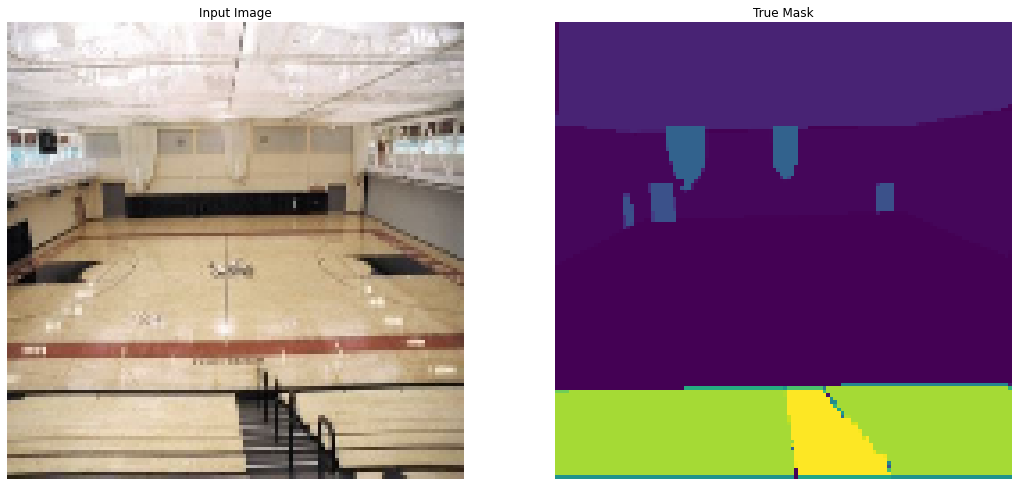

In [ ]:
def display_sample(display_list):
    """Show side-by-side an input image,
    the ground truth and the prediction.
    """
    plt.figure(figsize=(18, 18))

    title = ['Input Image', 'True Mask', 'Predicted Mask']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

for image, mask in dataset['train'].take(1):
    sample_image, sample_mask = image, mask

display_sample([sample_image[0], sample_mask[0]])

In [ ]:
# -- Keras Functional API -- #
# -- UNet Implementation -- #
# Everything here is from tensorflow.keras.layers
# I imported tensorflow.keras.layers * to make it easier to read
dropout_rate = 0.5
input_size = (IMG_SIZE, IMG_SIZE, N_CHANNELS)

# If you want to know more about why we are using `he_normal`: 
# https://stats.stackexchange.com/questions/319323/whats-the-difference-between-variance-scaling-initializer-and-xavier-initialize/319849#319849  
# Or the excelent fastai course: 
# https://github.com/fastai/course-v3/blob/master/nbs/dl2/02b_initializing.ipynb
initializer = 'he_normal'


# -- Encoder -- #
# Block encoder 1
inputs = Input(shape=input_size)
conv_enc_1 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer=initializer)(inputs)
conv_enc_1 = Conv2D(64, 3, activation = 'relu', padding='same', kernel_initializer=initializer)(conv_enc_1)

# Block encoder 2
max_pool_enc_2 = MaxPooling2D(pool_size=(2, 2))(conv_enc_1)
conv_enc_2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(max_pool_enc_2)
conv_enc_2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(conv_enc_2)

# Block  encoder 3
max_pool_enc_3 = MaxPooling2D(pool_size=(2, 2))(conv_enc_2)
conv_enc_3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(max_pool_enc_3)
conv_enc_3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(conv_enc_3)

# Block  encoder 4
max_pool_enc_4 = MaxPooling2D(pool_size=(2, 2))(conv_enc_3)
conv_enc_4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(max_pool_enc_4)
conv_enc_4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(conv_enc_4)
# -- Encoder -- #

# ----------- #
maxpool = MaxPooling2D(pool_size=(2, 2))(conv_enc_4)
conv = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(maxpool)
conv = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(conv)
# ----------- #

# -- Dencoder -- #
# Block decoder 1
up_dec_1 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = initializer)(UpSampling2D(size = (2,2))(conv))
merge_dec_1 = concatenate([conv_enc_4, up_dec_1], axis = 3)
conv_dec_1 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(merge_dec_1)
conv_dec_1 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(conv_dec_1)

# Block decoder 2
up_dec_2 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = initializer)(UpSampling2D(size = (2,2))(conv_dec_1))
merge_dec_2 = concatenate([conv_enc_3, up_dec_2], axis = 3)
conv_dec_2 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(merge_dec_2)
conv_dec_2 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(conv_dec_2)

# Block decoder 3
up_dec_3 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = initializer)(UpSampling2D(size = (2,2))(conv_dec_2))
merge_dec_3 = concatenate([conv_enc_2, up_dec_3], axis = 3)
conv_dec_3 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(merge_dec_3)
conv_dec_3 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(conv_dec_3)

# Block decoder 4
up_dec_4 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = initializer)(UpSampling2D(size = (2,2))(conv_dec_3))
merge_dec_4 = concatenate([conv_enc_1, up_dec_4], axis = 3)
conv_dec_4 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(merge_dec_4)
conv_dec_4 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(conv_dec_4)
conv_dec_4 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(conv_dec_4)
# -- Dencoder -- #

output = Conv2D(N_CLASSES, 1, activation = 'softmax')(conv_dec_4)

# Load and compile the model
model = tf.keras.Model(inputs = inputs, outputs = output)
model.compile(optimizer=Adam(learning_rate=0.0001), loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

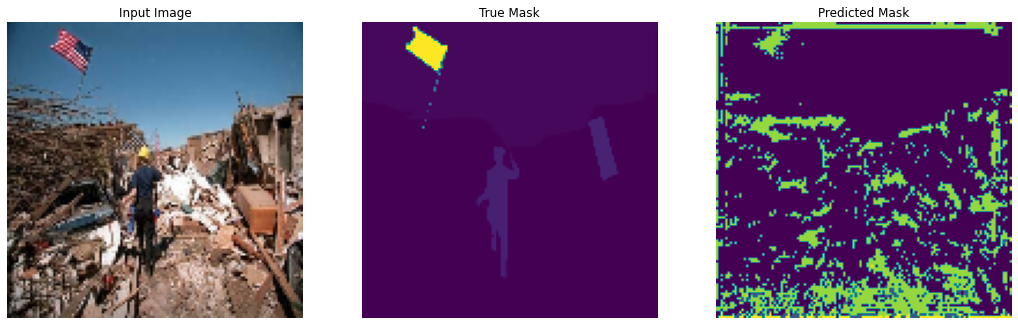

In [ ]:
def create_mask(pred_mask: tf.Tensor) -> tf.Tensor:
    """Return a filter mask with the top 1 predicitons
    only.

    Parameters
    ----------
    pred_mask : tf.Tensor
        A [IMG_SIZE, IMG_SIZE, N_CLASS] tensor. For each pixel we have
        N_CLASS values (vector) which represents the probability of the pixel
        being these classes. Example: A pixel with the vector [0.0, 0.0, 1.0]
        has been predicted class 2 with a probability of 100%.

    Returns
    -------
    tf.Tensor
        A [IMG_SIZE, IMG_SIZE, 1] mask with top 1 predictions
        for each pixels.
    """
    # pred_mask -> [IMG_SIZE, SIZE, N_CLASS]
    # 1 prediction for each class but we want the highest score only
    # so we use argmax
    pred_mask = tf.argmax(pred_mask, axis=-1)
    # pred_mask becomes [IMG_SIZE, IMG_SIZE]
    # but matplotlib needs [IMG_SIZE, IMG_SIZE, 1]
    pred_mask = tf.expand_dims(pred_mask, axis=-1)
    return pred_mask
    
def show_predictions(dataset=None, num=1):
    """Show a sample prediction.

    Parameters
    ----------
    dataset : [type], optional
        [Input dataset, by default None
    num : int, optional
        Number of sample to show, by default 1
    """
    if dataset:
        for image, mask in dataset.take(num):
            pred_mask = model.predict(image)
            display_sample([image[0], true_mask, create_mask(pred_mask)])
    else:
        # The model is expecting a tensor of the size
        # [BATCH_SIZE, IMG_SIZE, IMG_SIZE, 3]
        # but sample_image[0] is [IMG_SIZE, IMG_SIZE, 3]
        # and we want only 1 inference to be faster
        # so we add an additional dimension [1, IMG_SIZE, IMG_SIZE, 3]
        one_img_batch = sample_image[0][tf.newaxis, ...]
        # one_img_batch -> [1, IMG_SIZE, IMG_SIZE, 3]
        inference = model.predict(one_img_batch)
        # inference -> [1, IMG_SIZE, IMG_SIZE, N_CLASS]
        pred_mask = create_mask(inference)
        # pred_mask -> [1, IMG_SIZE, IMG_SIZE, 1]
        display_sample([sample_image[0], sample_mask[0],
                        pred_mask[0]])

# show predictions
for image, mask in dataset['train'].take(1):
    sample_image, sample_mask = image, mask

show_predictions()

In [ ]:
!pip install tfa-nightly

     |████████████████████████████████| 1.1 MB 2.7 MB/s 


In [ ]:
import tensorflow as tf
import tensorflow_addons as tfa
class DisplayCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        clear_output(wait=True)
        show_predictions()
        print ('\nSample Prediction after epoch {}\n'.format(epoch+1))

EPOCHS = 20
STEPS_PER_EPOCH = TRAINSET_SIZE // BATCH_SIZE
VALIDATION_STEPS = VALSET_SIZE // BATCH_SIZE

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

callbacks = [
    # to show samples after each epoch
    DisplayCallback(),
    # to collect some useful metrics and visualize them in tensorboard
    tensorboard_callback,
    # if no accuracy improvements we can stop the training directly
    tf.keras.callbacks.EarlyStopping(patience=10, verbose=1),
    # to save checkpoints
    tf.keras.callbacks.ModelCheckpoint('best_model_unet.h5', verbose=1, save_best_only=True, save_weights_only=True)
]

model = tf.keras.Model(inputs = inputs, outputs = output)

optimizer=tfa.optimizers.RectifiedAdam(lr=1e-3)

loss = tf.keras.losses.SparseCategoricalCrossentropy()

model.compile(optimizer=optimizer, loss = loss,
                  metrics=['accuracy'])
model_history = model.fit(dataset['train'], epochs=EPOCHS,
                    steps_per_epoch=STEPS_PER_EPOCH,
                    validation_steps=VALIDATION_STEPS,
                    validation_data=dataset['val'],
                    callbacks=callbacks)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
1982/4042 [=============>................] - ETA: 5:42:51 - loss: 3.7437 - accuracy: 0.1353